In [1]:
import pandas as pd
import numpy as np

In [2]:
train=pd.read_json('Data/train.json', dtype={'inc_angle': str})
test=pd.read_json('Data/test.json', dtype={'inc_angle': str})

In [3]:
print(len(train.inc_angle.unique()), train.inc_angle.unique())

879 ['43.9239' '38.1562' '45.2859' '43.8306' '35.6256' '36.9034' '34.4751'
 '41.1769' '35.7829' '43.3007' '44.624' '39.5067' '41.8544' '45.2909'
 '34.7715' '43.782' '45.3568' '38.7812' '42.5145' '37.2802' '41.7973'
 '38.0669' '39.6636' '37.6866' '40.296' '39.234' '40.3904' '43.7895'
 '42.5891' '41.0303' '34.8721' '34.0537' '43.9466' '44.6239' '33.9978'
 '35.7025' '35.2954' '34.4721' '41.4386' '42.1483' '39.5936' '31.4597'
 '43.1096' '44.4569' '31.3432' '36.1061' '40.7118' '40.9588' '38.0736'
 '38.85' '44.5876' '42.5742' '36.4792' '42.5376' '39.5371' '36.4987'
 '35.6588' '36.3984' '41.1294' '32.265' '38.9177' '42.5612' '30.4869'
 '40.367' '33.1315' '45.1398' '41.434' '40.7001' '37.338' '45.3718'
 '44.615' '38.4608' '42.5381' '37.6877' '34.4718' '42.7764' '42.5378'
 '37.2861' '36.4332' '39.9784' '35.2957' '36.9031' '35.7863' '43.2624'
 '34.8702' '43.9577' '37.9756' '42.4473' '38.1108' '43.1055' '39.5835'
 '35.2945' '41.1342' 'na' '33.6352' '34.8715' '34.0473' '43.2268' '36.3966'
 '42.559

In [4]:
print(train.inc_angle.value_counts())

na         133
34.4721     23
42.5591     16
36.1061     15
33.6352     15
39.234      13
39.2166     11
45.2814     11
39.9784     11
38.4755     11
45.2859     10
34.4709     10
42.559      10
35.7863      9
34.4718      9
40.7118      9
39.2325      9
40.7129      9
37.6877      9
38.4591      9
35.2957      8
38.0736      8
37.6866      8
42.5644      7
38.8594      7
43.2611      7
36.9034      7
40.3904      7
42.5598      6
40.7177      6
          ... 
35.5574      1
37.3661      1
40.2988      1
30.4878      1
44.4598      1
38.9233      1
36.5404      1
30.1586      1
41.205       1
40.9858      1
38.1386      1
42.5603      1
44.4635      1
42.5376      1
38.1493      1
43.7937      1
45.2396      1
32.2419      1
36.5092      1
35.6978      1
36.6286      1
41.0303      1
40.2467      1
40.4161      1
41.2         1
34.7651      1
37.1897      1
40.9835      1
35.2975      1
37.9814      1
Name: inc_angle, Length: 879, dtype: int64


In [5]:
vc = train.inc_angle.value_counts()
train_leak_df = pd.DataFrame()
train_leak_df['ang'] = np.array(vc.index)
train_leak_df['cnt'] = vc.values
train_leak_df

,ang,cnt
0,na,133
1,34.4721,23
2,42.5591,16
3,36.1061,15
4,33.6352,15
5,39.234,13
6,39.2166,11
7,45.2814,11
8,39.9784,11
9,38.4755,11


In [6]:
def get_ice_percent(row):
    ang = row['ang']
    return train.loc[train.inc_angle == ang, 'is_iceberg'].sum()

In [7]:
train_leak_df['ice_percent'] = train_leak_df.apply(get_ice_percent, axis=1) / train_leak_df['cnt']
train_leak_df['ship_percent'] = 1.0 - train_leak_df['ice_percent']
train_leak_df

,ang,cnt,ice_percent,ship_percent
0,na,133,0.0,1.0
1,34.4721,23,1.0,0.0
2,42.5591,16,1.0,0.0
3,36.1061,15,1.0,0.0
4,33.6352,15,1.0,0.0
5,39.234,13,1.0,0.0
6,39.2166,11,1.0,0.0
7,45.2814,11,1.0,0.0
8,39.9784,11,1.0,0.0
9,38.4755,11,1.0,0.0


In [8]:
mask = (train_leak_df['ice_percent'] == 0) | (train_leak_df['ice_percent'] == 1.)
print(mask.value_counts())

True     873
False      6
Name: ice_percent, dtype: int64


(array([ 812.,   28.,   16.,   10.,    7.,    1.,    3.,    0.,    0.,    1.]),
 array([  1. ,   3.2,   5.4,   7.6,   9.8,  12. ,  14.2,  16.4,  18.6,
         20.8,  23. ]),
 <a list of 10 Patch objects>)

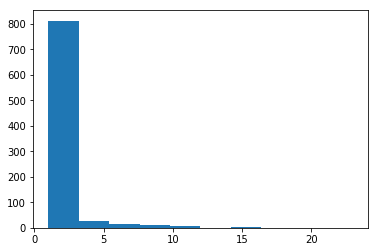

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(train_leak_df[train_leak_df.ang != 'na'].cnt)

In [10]:
mask = ((train_leak_df['ice_percent'] == 0) | (train_leak_df['ice_percent'] == 1.)) & (train_leak_df['cnt'] >= 3)
print(mask.value_counts())
train_leak_df[mask]

False    773
True     106
dtype: int64


,ang,cnt,ice_percent,ship_percent
0,na,133,0.0,1.0
1,34.4721,23,1.0,0.0
2,42.5591,16,1.0,0.0
3,36.1061,15,1.0,0.0
4,33.6352,15,1.0,0.0
5,39.234,13,1.0,0.0
6,39.2166,11,1.0,0.0
7,45.2814,11,1.0,0.0
8,39.9784,11,1.0,0.0
9,38.4755,11,1.0,0.0


In [11]:
ths = train_leak_df.cnt.unique()
ths

array([133,  23,  16,  15,  13,  11,  10,   9,   8,   7,   6,   5,   4,
         3,   2,   1], dtype=int64)

In [12]:
for th in [23,16,15,13,11,10,9,8,7,6,5,4,3,2]:
    mask = ((train_leak_df['ice_percent'] == 0) | (train_leak_df['ice_percent'] == 1.)) & (train_leak_df['cnt'] >= th)
    save_df = train_leak_df[mask].reset_index(drop=True)
    save_df['inc_angle'] = save_df['ang']
    save_df['is_iceberg'] = save_df['ice_percent']
    save_df[['inc_angle', 'is_iceberg']].to_csv('Data/data_leakage_th_{}.csv'.format(th), index=False)